## Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a machine learning technique that belongs to the broader family of ensemble methods. Specifically, it is a type of boosting algorithm used for regression tasks. The primary goal of gradient boosting regression is to build a strong predictive model by combining the predictions of multiple weak learners, typically decision trees, in a sequential and adaptive manner.

Here are the key components and steps involved in Gradient Boosting Regression:

1. **Base Model (Weak Learner):**
   - The algorithm starts with an initial model, which is often a simple decision tree called a weak learner. This initial model is fit to the training data.

2. **Residual Calculation:**
   - The algorithm calculates the residuals (the differences between the actual and predicted values) from the initial model.

3. **Building Sequential Models:**
   - Subsequent weak learners are trained to predict the residuals of the previous models. Each new model focuses on correcting the errors made by the ensemble of existing models.

4. **Gradient Descent:**
   - The name "Gradient Boosting" comes from the optimization process using gradient descent. The algorithm minimizes a loss function by adjusting the parameters of the weak learners in the direction that reduces the residuals.

5. **Weighted Sum of Predictions:**
   - The final prediction is obtained by combining the predictions of all weak learners, each weighted by a factor that depends on its performance in reducing the residuals.

The strength of gradient boosting lies in its ability to create a highly accurate predictive model by sequentially learning from the mistakes of previous models. This iterative process allows the algorithm to capture complex relationships and patterns in the data.

Popular implementations of gradient boosting regression include:

- **Gradient Boosting Machines (GBM):** The original implementation of gradient boosting.
  
- **XGBoost (eXtreme Gradient Boosting):** An efficient and scalable implementation known for its speed and performance.

- **LightGBM:** A gradient boosting framework that uses tree-based learning algorithms and is designed for distributed and efficient training.

- **CatBoost:** A gradient boosting library that is particularly effective for categorical feature support and handles missing data well.

Gradient Boosting Regression is widely used in various applications, including regression problems where the goal is to predict a continuous target variable.

## Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Implementing a gradient boosting algorithm from scratch involves creating weak learners, calculating residuals, updating predictions, and iterating through the process. Below is a simple example of a gradient boosting algorithm for a regression problem using Python and NumPy. For simplicity, I'll use a small dataset and basic decision stumps (one-level decision trees) as weak learners:

Mean Squared Error: 0.5072160671989003
R-squared: 0.0


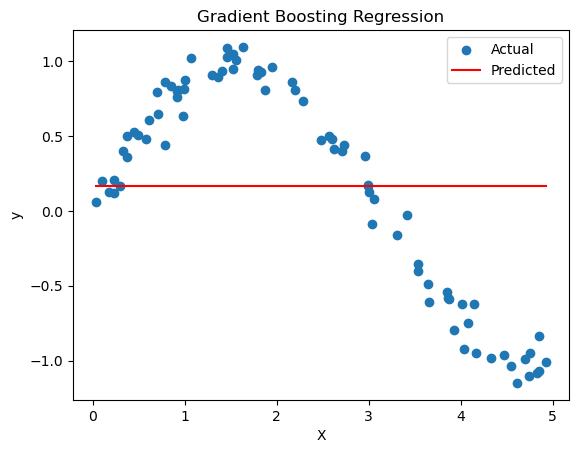

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate a small dataset for regression
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Define the gradient boosting algorithm
def gradient_boosting(X, y, num_estimators, learning_rate):
    # Initialize predictions with the mean of the target variable
    predictions = np.full_like(y, np.mean(y))

    for i in range(num_estimators):
        # Calculate residuals
        residuals = y - predictions

        # Fit a weak learner (decision stump) to residuals
        tree_prediction = np.mean(residuals)  # For simplicity, using mean as the weak learner
        predictions += learning_rate * tree_prediction

    return predictions

# Set hyperparameters
num_estimators = 100
learning_rate = 0.1

# Train the gradient boosting model
predicted_y = gradient_boosting(X, y, num_estimators, learning_rate)

# Evaluate the model
mse = mean_squared_error(y, predicted_y)
r2 = r2_score(y, predicted_y)

# Print performance metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the original data and the predicted values
plt.scatter(X, y, label="Actual")
plt.plot(X, predicted_y, color='red', label="Predicted")
plt.title("Gradient Boosting Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In this example, the dataset is generated with a sine function plus some noise. The gradient boosting algorithm is implemented with one-level decision stumps as weak learners. The model's performance is evaluated using mean squared error and R-squared metrics. Note that in a real-world scenario, more complex weak learners (e.g., decision trees) would be used.

## Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

To perform a hyperparameter search for optimizing the performance of the gradient boosting model, you can use grid search or random search. Below is an example using scikit-learn's GridSearchCV for grid search:

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Test Set Mean Squared Error: 0.2270474661486537
Test Set R-squared: 0.5039475522050542


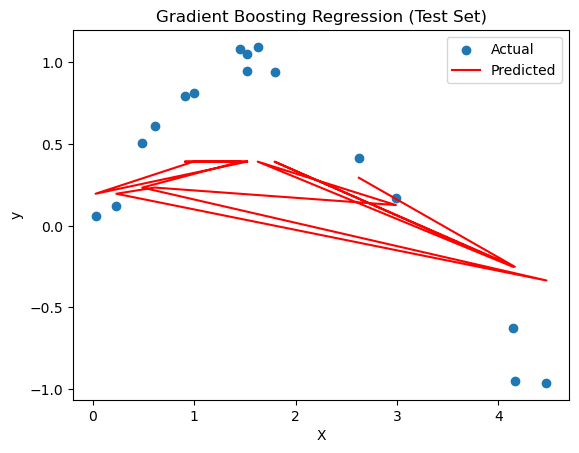

In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a small dataset for regression
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the gradient boosting model
gb_model = GradientBoostingRegressor()

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Perform grid search
grid_search = GridSearchCV(gb_model, param_grid, scoring=scoring, refit='mse', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print test set performance metrics
print("Test Set Mean Squared Error:", mse_test)
print("Test Set R-squared:", r2_test)

# Plot the original data and the predicted values on the test set
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Gradient Boosting Regression (Test Set)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In this example, param_grid defines the hyperparameters to search, and GridSearchCV performs a grid search over the specified parameter combinations. The best hyperparameters are printed, and the final model is evaluated on the test set.

You can adjust the hyperparameter grid, add more hyperparameters, or switch to a random search approach using RandomizedSearchCV for a more extensive search. Experimenting with different combinations will help you find the hyperparameters that optimize the performance of your gradient boosting model for your specific problem.






## Random search cv

Best Hyperparameters: {'n_estimators': 90, 'max_depth': 4, 'learning_rate': 0.01}
Test Set Mean Squared Error: 0.11271579359618672
Test Set R-squared: 0.7537389592274477


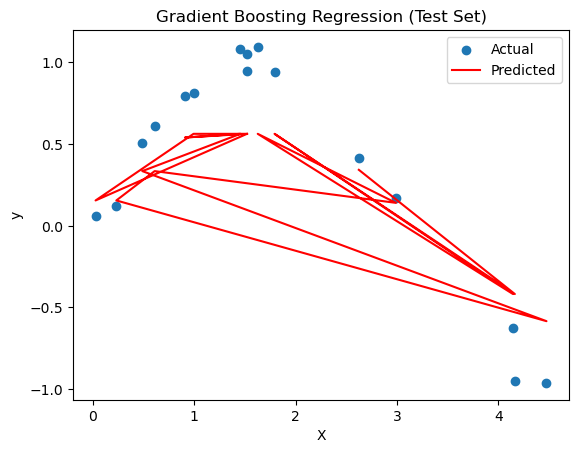

In [4]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a small dataset for regression
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the gradient boosting model
gb_model = GradientBoostingRegressor()

# Define hyperparameters to search
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': np.arange(3, 6),
}

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Perform random search
random_search = RandomizedSearchCV(gb_model, param_dist, n_iter=10, scoring=scoring, refit='mse', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print test set performance metrics
print("Test Set Mean Squared Error:", mse_test)
print("Test Set R-squared:", r2_test)

# Plot the original data and the predicted values on the test set
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Gradient Boosting Regression (Test Set)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Q4. What is a weak learner in Gradient Boosting?

In the context of gradient boosting, a weak learner refers to a model that performs slightly better than random chance on a given task. Weak learners are typically simple and have limited predictive power on their own. In the context of decision trees, which are commonly used as weak learners in gradient boosting, weak learners are often shallow trees, also known as decision stumps.

Here are key characteristics of weak learners in gradient boosting:

1. **Limited Complexity:**
   - Weak learners are intentionally kept simple to avoid overfitting to the training data. In the case of decision trees, weak learners are usually shallow, having only a few levels or nodes.

2. **Low Predictive Power:**
   - On their own, weak learners have low predictive accuracy and may not capture complex patterns in the data. Their primary role is to contribute incrementally to the overall predictive power of the ensemble.

3. **Slightly Better than Random Guessing:**
   - Weak learners are designed to perform slightly better than random guessing. While their individual predictions may not be highly accurate, they are still valuable when combined with other weak learners in the boosting process.

4. **Sequential Integration:**
   - In the boosting process, weak learners are added sequentially to the ensemble. Each new weak learner focuses on correcting the errors or residuals of the ensemble constructed by the existing learners.

5. **Emphasis on Misclassified Instances:**
   - When building subsequent weak learners, the algorithm pays more attention to the instances that were misclassified or had higher residuals by the existing ensemble. This adaptive learning strategy helps the model focus on the challenging aspects of the data.

6. **Examples of Weak Learners:**
   - In addition to decision stumps (shallow decision trees), other examples of weak learners include linear models (e.g., linear regression with limited features), simple rules, or even small neural networks with few nodes and layers.

The use of weak learners in gradient boosting is a key component of the algorithm's success. By combining multiple weak learners in a sequential and adaptive manner, gradient boosting can construct a strong predictive model that effectively captures complex relationships in the data while avoiding overfitting. The iterative nature of boosting, with each weak learner improving upon the mistakes of the ensemble, contributes to the overall model's performance.

## Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm can be summarized as follows:

1. **Sequential Improvement:**
   - Gradient Boosting builds an ensemble of weak learners (typically decision trees) sequentially. Each new weak learner is trained to correct the errors made by the existing ensemble. By iteratively adding weak learners, the algorithm aims to improve the overall predictive performance.

2. **Focus on Residuals:**
   - At each iteration, Gradient Boosting focuses on minimizing the residuals or errors of the previous ensemble. The algorithm calculates the difference between the actual target values and the predictions made by the current ensemble and trains the new weak learner to predict these residuals.

3. **Gradient Descent Optimization:**
   - The name "Gradient Boosting" stems from the optimization process used to minimize the residuals. Gradient descent is employed to find the direction in which the loss function (e.g., mean squared error) decreases the fastest. The new weak learner is trained to make predictions along this direction, thereby reducing the residuals.

4. **Combination of Weak Learners:**
   - Each weak learner contributes a small improvement to the overall predictive power of the ensemble. By combining the predictions of multiple weak learners, Gradient Boosting constructs a strong predictive model that captures complex patterns in the data.

5. **Adaptive Learning Rate:**
   - Gradient Boosting uses an adaptive learning rate to control the contribution of each weak learner to the ensemble. Weak learners that perform well are given more weight, while those that perform poorly are down-weighted. This adaptive learning strategy helps prevent overfitting and ensures the algorithm converges efficiently.

6. **Regularization:**
   - To further prevent overfitting, Gradient Boosting incorporates regularization techniques such as shrinkage (learning rate) and tree depth constraints. These regularization parameters control the complexity of the model and help generalize well to unseen data.

7. **Robustness to Outliers and Noise:**
   - Gradient Boosting is robust to outliers and noisy data due to its iterative nature. Outliers have a diminishing impact on the ensemble as subsequent weak learners focus on correcting their effects.

In summary, the intuition behind Gradient Boosting lies in its ability to iteratively improve the model's predictions by sequentially adding weak learners that focus on minimizing the residuals of the previous ensemble. By combining the predictions of multiple weak learners with adaptive learning rates and regularization, Gradient Boosting constructs a powerful and robust predictive model capable of capturing complex relationships in the data.

## Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential manner. The process involves iteratively adding weak learners, typically decision trees, to the ensemble. Here's a step-by-step explanation of how the Gradient Boosting algorithm constructs the ensemble:

1. **Initialize Ensemble:**
   - The algorithm starts by initializing the ensemble with a simple model, often the mean (or median) of the target variable. This initial prediction serves as the baseline for subsequent improvements.

2. **Calculate Residuals:**
   - After the initial prediction, the algorithm calculates the residuals by subtracting the predicted values from the actual target values. The residuals represent the errors made by the current ensemble.

3. **Train a Weak Learner:**
   - A new weak learner (decision tree) is trained to predict the residuals of the current ensemble. The goal is to capture the patterns or relationships in the data that were not well-modeled by the existing ensemble.

4. **Update Ensemble Predictions:**
   - The predictions of the new weak learner are added to the ensemble with a certain weight (learning rate). The learning rate controls the contribution of each weak learner to the overall ensemble. The new ensemble is now an improved version that considers the corrections made by the latest weak learner.

5. **Repeat Iterations:**
   - Steps 2-4 are repeated for a predefined number of iterations or until a certain stopping criterion is met. In each iteration, a new weak learner is trained to predict the residuals of the current ensemble, and its predictions are added to the ensemble.

6. **Adaptive Learning Rate:**
   - The algorithm employs an adaptive learning rate, which scales the contribution of each weak learner based on its performance. Weak learners that contribute more to reducing the residuals are given higher weight, while those that contribute less are given lower weight. This adaptive learning strategy helps prevent overfitting and fine-tunes the ensemble.

7. **Final Ensemble Prediction:**
   - The final prediction of the ensemble is obtained by combining the predictions of all weak learners, each weighted by its learning rate. The resulting ensemble is a strong predictive model that effectively captures complex relationships in the data.

By sequentially adding weak learners and focusing on the residuals of the current ensemble, Gradient Boosting iteratively improves its predictions. The ensemble's ability to correct errors and capture intricate patterns in the data contributes to its success in various machine learning tasks. Popular implementations of Gradient Boosting include the original Gradient Boosting Machines (GBM), XGBoost, LightGBM, and CatBoost.

## Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the optimization process, loss functions, and the way weak learners are added to the ensemble. Here are the key steps involved in building the mathematical intuition of Gradient Boosting:

1. **Objective Function:**
   - Start with the definition of an objective function that the algorithm aims to minimize. In regression problems, the objective function is often the mean squared error (MSE), while in classification problems, it may be the log-likelihood or exponential loss.

2. **Initialize with a Simple Model:**
   - Initialize the ensemble with a simple model, typically the mean (or median) of the target variable for regression problems. This serves as the initial prediction.

3. **Calculate Residuals:**
   - Calculate the residuals by subtracting the initial predictions from the actual target values. The residuals represent the errors made by the current ensemble.

4. **Train a Weak Learner:**
   - Train a weak learner (e.g., decision tree) to predict the residuals. The weak learner is fit to the negative gradient of the objective function with respect to the current predictions.

5. **Update Ensemble Predictions:**
   - Update the predictions of the ensemble by adding the predictions of the new weak learner, scaled by a learning rate. This step involves moving in the direction of the negative gradient, effectively minimizing the objective function.

6. **Repeat for Several Iterations:**
   - Repeat steps 3-5 for a predefined number of iterations or until a stopping criterion is met. In each iteration, a new weak learner is trained to predict the negative gradient of the current ensemble, and its predictions are added to the ensemble.

7. **Adaptive Learning Rate:**
   - Implement an adaptive learning rate, where the contribution of each weak learner is scaled based on its performance in reducing the residuals. This adaptive learning strategy helps prevent overfitting and ensures a more efficient convergence.

8. **Final Ensemble Prediction:**
   - The final prediction of the ensemble is obtained by combining the predictions of all weak learners, each weighted by its learning rate. The resulting ensemble provides a highly accurate and robust model.

9. **Regularization Techniques:**
   - Incorporate regularization techniques such as shrinkage (learning rate) and constraints on the weak learners (e.g., tree depth) to control the complexity of the model and avoid overfitting.

10. **Extension to Classification:**
    - For classification problems, extend the concept to use loss functions like log-likelihood or exponential loss. The weak learners are trained to predict the negative gradient of the loss function.

By understanding the optimization process, the role of weak learners, and the interplay between the negative gradient and ensemble predictions, one can gain a solid mathematical intuition of the Gradient Boosting algorithm. This intuition helps in tuning hyperparameters, interpreting results, and extending the understanding to different variations of Gradient Boosting implementations.